# ACA ESTA FUNCIONES.PY


In [38]:
"""

Trabajo Práctico 2   Matrices insumo-producto
Álgebra Lineal Computacional - 2do cuatrimestre 2024

Grupo: TIBURONES

Integrantes:
- Victoria Pérez Olivera
- Ignacio Gallego
- Evangelina Fomina

"""


#CONTENIDO RECICLADO DEL TP1

import numpy
from numpy.linalg import matrix_power

def calcularLU(A):
    """
    Calcula la descomposición LU de una matriz cuadrada A.

    Parámetros:
    A : numpy.ndarray
        Matriz cuadrada que se desea descomponer.

    Retorna:
    L : numpy.ndarray
        Matriz triangular inferior.
    U : numpy.ndarray
        Matriz triangular superior.
    P : numpy.ndarray
        Matriz de permutación utilizada en el proceso de descomposición.
    """
    m = A.shape[0]  # Número de filas de A
    n = A.shape[1]  # Número de columnas de A

    U = A.copy()  # Copia de A para realizar la descomposición
    U = U.astype(float)  # Asegura que U sea de tipo float

    if m != n:
        print('Matriz no cuadrada')  # Verifica que la matriz sea cuadrada
        return

    P = numpy.eye(n)  # Matriz de permutación inicial (identidad)
    L = numpy.eye(n)  # Matriz triangular inferior inicial (identidad)
    L = L.astype(float)  # Asegura que L sea de tipo float

    for i in range(n):
        Pj = numpy.eye(n)  # Matriz de permutación para la columna actual

        # Si el pivote es cero, se busca una fila para intercambiar
        if U[i, i] == 0:
            for j in range(i + 1, n):
                if U[j, i] != 0:  # Se encuentra un pivote no cero
                    Pj[i, :] += Pj[j, :]  # Intercambio de filas
                    Pj[j, :] = Pj[i, :] - Pj[j, :]
                    Pj[i, :] -= Pj[j, :]
                    P = Pj @ P  # Actualiza la matriz de permutación
                    break
                elif j == n - 1:
                    print('Todos los coeficientes de esta columna son 0')
                    break

        U = Pj @ U  # Aplica la permutación a U
        L = Pj @ L @ Pj  # Actualiza L con la permutación

        # Eliminación hacia adelante
        for j in range(i + 1, n):
            factor = U[j, i] / U[i, i]  # Calcula el factor de eliminación
            L[j, i] = factor  # Almacena el factor en L
            U[j, i:] = U[j, i:] - factor * U[i, i:]  # Actualiza U

    return L, U, P  # Retorna las matrices L, U y P

def inversaLU(L, U, P):
    """
    Calcula la inversa de una matriz utilizando la descomposición LU.

    Parámetros:
    L : numpy.ndarray
        Matriz triangular inferior.
    U : numpy.ndarray
        Matriz triangular superior.
    P : numpy.ndarray
        Matriz de permutación utilizada en el proceso de descomposición.

    Retorna:
    numpy.ndarray
        Matriz inversa de la matriz original.
    """
    return invertir(U) @ invertir(L) @ P  # Retorna la inversa calculada

def leontiefizar(A):
    """
    Calcula la matriz Leontief a partir de la matriz insumo-producto A.

    Parámetros:
    A : numpy.ndarray
        Matriz insumo-producto que se desea transformar.

    Retorna:
    numpy.ndarray
        Matriz Leontief resultante.
    """
    n = A.shape[0]  # Número de sectores (filas de A)
    I_A = numpy.eye(n) - A  # Matriz identidad menos A
    Low, Up, P = calcularLU(I_A)  # Descomposición LU de I - A
    return inversaLU(Low, Up, P)  # Retorna la inversa de la matriz resultante

'''
FUNCIONES AUXILIARES
'''

def invertir(M):
    """
    Calcula la inversa de una matriz M utilizando eliminación de Gauss.

    Parámetros:
    M : numpy.ndarray
        Matriz que se desea invertir.

    Retorna:
    numpy.ndarray
        Matriz inversa de M.
    """
    A = numpy.copy(M)  # Copia de la matriz original
    A = A.astype(float)  # Asegura que A sea de tipo float

    A_aug = numpy.hstack((A, numpy.eye(A.shape[0])))  # Matriz aumentada
    A_inv = sustHaciaAtras(triangularizarU(A_aug))  # Aplicar sustitución hacia atrás en U

    return A_inv  # Retorna la matriz inversa

def sustHaciaAtras(A_aug):
    """
    Realiza la sustitución hacia atrás sobre una matriz aumentada.

    Parámetros:
    A_aug : numpy.ndarray
        Matriz aumentada que se desea resolver.

    Retorna:
    numpy.ndarray
        Parte de la matriz que contiene la solución.
    """
    n = A_aug.shape[0]  # Número de filas

    for i in range(n - 1, -1, -1):
        A_aug[i] = A_aug[i] / A_aug[i, i]  # Normaliza la fila actual

        for j in range(i):
            A_aug[j] -= A_aug[i] * A_aug[j, i]  # Elimina la variable de la fila j

    return A_aug[:, n:]  # Retorna solo la parte de solución

def triangularizarU(M):
    """
    Transforma una matriz M en forma triangular superior.

    Parámetros:
    M : numpy.ndarray
        Matriz que se desea triangularizar.

    Retorna:
    numpy.ndarray
        Matriz triangular superior resultante.
    """
    A = numpy.copy(M)  # Copia de la matriz original
    A = A.astype(float)  # Asegura que A sea de tipo float

    f, c = A.shape  # Obtiene el número de filas y columnas
    if f == 0 or c == 0:
        return A  # Retorna la matriz vacía si no hay filas o columnas

    i = 0

    # Encuentra la primera fila no cero
    while i < f and A[i, 0] == 0:
        i += 1

    if i == f:
        B = triangularizarU(A[:, 1:])  # Recursión si no se encuentra fila no cero
        return numpy.block([A[:, :1], B])  # Retorna matriz con columna inicial

    if i > 0:
        A[[0, i], :] = A[[i, 0], :]  # Intercambia filas si es necesario

    # Realiza eliminación hacia adelante
    A[1:, :] -= (A[0, :] / A[0, 0]) * A[1:, 0:1]

    B = triangularizarU(A[1:, 1:])  # Llama recursivamente para triangularizar el resto

    return numpy.block([[A[:1, :]], [A[1:, :1], B]])  # Retorna la matriz triangular superior


#CONTENIDO DESARROLLADO PARA TP2


def metodoPotencia(A, v, k):
    v = v / np.linalg.norm(v, 2)

    for i in range(k):
        Av = A @ v
        v = Av / np.linalg.norm(Av, 2)
        l = v.T@A@v
    return (l)



def metodoMonteCarlo(A,k):
    avals = np.zeros(k)

    for i in range(k):
        v = np.random.rand(A.shape[0])
        l=metodoPotencia(A, v, k)
        avals[i]=l
    return avals.mean().round(4), avals.std().round(4)



def seriePotencia(A, n):
    normas = []
    suma = np.eye(A.shape[0])
    for i in range(1, n+1):
        suma += matrix_power(A, i)
        normas.append(norm(suma, 2))
    return (suma, normas)



def En (n):
    """
    Devuelve la matriz E(n)
    
    Parámetros:
    n : entero
        Tamaño deseado de la matriz E(n)
        
    Retorna: 
    numpy.ndarray
        Matriz cuadrada E(n) del tamaño indicado    
    """
    return np.eye(n)-(1/n)*np.ones((n,1))@np.ones((1,n))

"""
def hotelling(A,k,e):
    """
    Calcula los primeros k autovectores de la matriz A.
    
    Parámetros:
    A : numpy.ndarray
        Matriz cuadrada cuyos autovectores se desea encontrar.
    k : entero
        Cantidad de autovectores deseados. 
    k : float64
        Margen de error deseado.         
    
    Retorna:
    list
        Lista de autovectores.
    list
        lista de autovalores en el mismo orden.    
    """    
    x = np.random.rand(A.shape[0])
    x = x / np.linalg.norm(x, 2)
    
    avecs = []
    avals = []
    
    for i in range(k):
        while True:
            x_prev=x
            x=A@x
            x=x / np.linalg.norm(x, 2)
            if np.linalg.norm(x-x_prev, 2)>(1-e):
                break
        
        l=(x.T@A@x)/(x.T@x)
        A=A-l*x@(x.T)
             
        avecs.append(x)
        avals.append(l)
        
    return avecs,avals

"""

IndentationError: unexpected indent (1512152924.py, line 251)

# ACA EMPIEZA LA RESO DEL TP

# Trabajo Práctico 2 - Matrices de Insumo Producto

Álgebra Lineal Computacional - 2do cuatrimestre 2024

Grupo: TIBURONES


Integrantes | Lib. | Email
:---: | :---: | :---:
Victoria Pérez Olivera | 604/23 | victoria.po@gmail.com
Ignacio Gallego | 733/22 | nachogallego01@gmail.com
Evangelina Fomina| 520/23 | evangelina.miloslav9@gmail.com

In [2]:

import numpy as np
import pandas as pd
import funciones as f
from scipy.linalg import norm
import matplotlib.pyplot as plt
from numpy.linalg import matrix_power

### Consigna 1 <font color="red">NACHO TE DONAMOS ESTA</font>

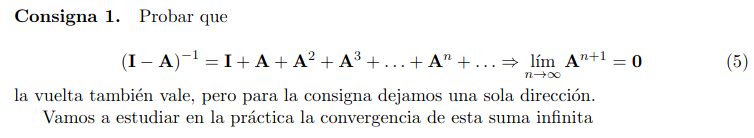

Idea: Si todos los modulos de los autovalores valen menor que 1 entonces la matriz va a tender a 0 elevándola a n+1

Idea 2: la suma de los terminos de una sucesion infinita solo puede converger si los terminos tienden a 0 a partir de cierto n

### Consigna 2 <font color="green">YA ESTÁ</font>

Calculamos las normas de A1 y A2 elevados de 1 a 250

In [3]:
#Defino la matriz A1
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

#Defino la matriz A2

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])


In [4]:
I = np.eye(5)
#Defino las listas de normas
a1 = []
a2 = []
Ak1 = I
Ak2 = I
for i in range(250):
    Ak1 = A1 @ Ak1
    a1.append(norm(Ak1, 2))

    Ak2 = A2 @ Ak2
    a2.append(norm(Ak2, 2))



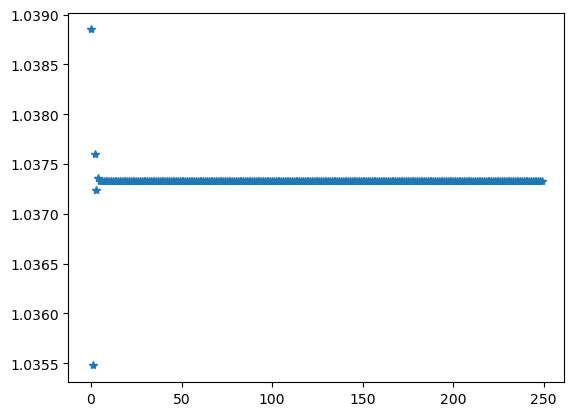

In [5]:
plt.plot(a1,"*")

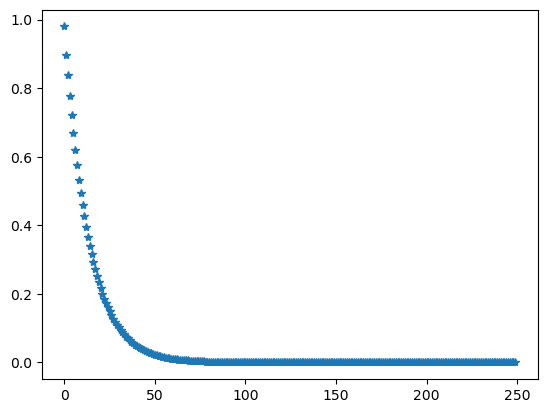

In [6]:
plt.plot(a2,"*")

### Consigna 3 <font color="green">YA ESTÁ</font>



Buscamos mayores autovalores de las matrices A1 y A2 usando el metodo de la potencia

In [7]:
# Número de iteraciones
k = 250

# Para la matriz A1
avalA1prom, avalA1desv = metodoMonteCarlo(A1,k)

# Para la matriz A2
avalA2prom, avalA2desv = metodoMonteCarlo(A2,k)



Hacemos una tabla de comparacion de promedio y desvio estandar de autovalores de las matrices A1 y A2

In [8]:
t = {"Promedio" : [avalA1prom, avalA2prom], "Desvio estandar" : [avalA1desv, avalA2desv]}
tabla = pd.DataFrame(data = t, index = ["A1", "A2"])
tabla

,Promedio,Desvio estandar
A1,1.0000,0.0
A2,0.9277,0.0


### Consigna 4 <font color="green">LISTO</font>

**(A)**     Graficamos la serie de potencias de (I-A)<sup>-1</sup>= I + A + A<sup>2</sup> + ... + A<sup>n</sup> para A<sub>1</sub> y A<sub>2</sub>, con n=10 y n=100

In [9]:
normas_A1_10 = seriePotencia(A1, 10)[1]
normas_A1_100 = seriePotencia(A1, 100)[1]
normas_A2_10 = seriePotencia(A2, 10)[1]
normas_A2_100 = seriePotencia(A2, 100)[1]

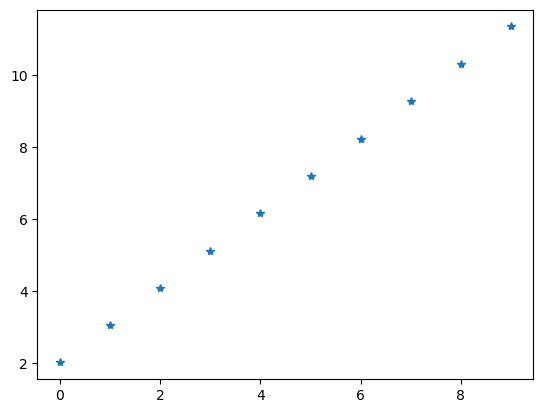

In [10]:
plt.plot(normas_A1_10, "*")

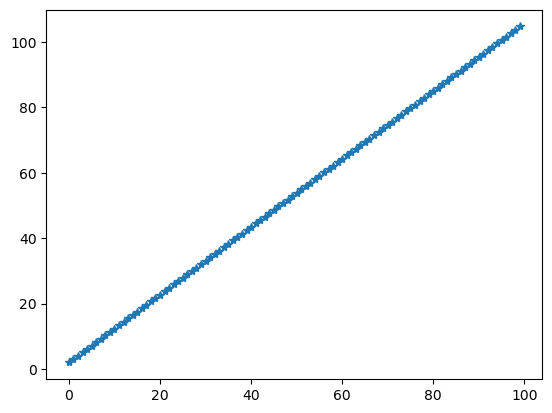

In [11]:
plt.plot(normas_A1_100, "*")

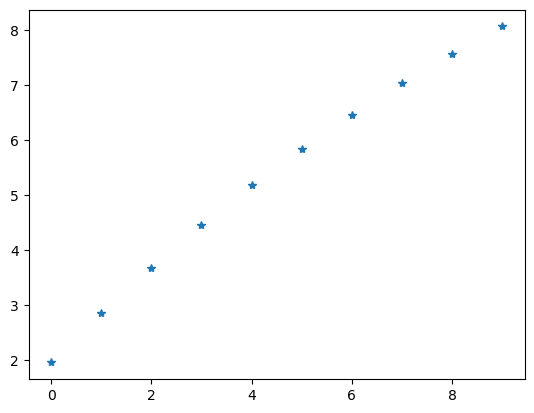

In [12]:
plt.plot(normas_A2_10, "*")

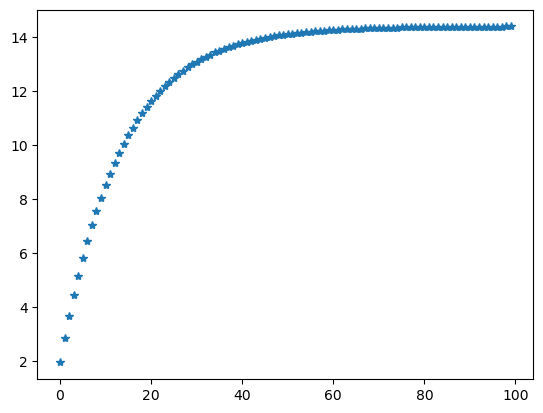

In [13]:
plt.plot(normas_A2_100, "*")

**(B)** Estudiamos la convergencia.

Podemos ver con el gráfico para n = 100 que la serie de potencias de la matriz A<sub>2</sub>, pasado cierto valor de n, empieza a crecer cada vez menos, hasta estabilizarse. Por lo cual podemos decir que converge para n grandes. 

La serie de potencias de a A<sub>1</sub>, en cambio, sigue creciendo de forma constante, al menos para n<100. 

De la misma forma para corroborarlo podemos compararla con la matriz Leontieff:


In [14]:
matriz1 = seriePotencia(A1, 100)[0]
matriz2 = seriePotencia(A2, 100)[0]
leon1 = leontiefizar(A1)
leon2 = leontiefizar(A2)

In [15]:
print("Serie de potencias de matriz A1 \n {}".format(matriz1), "\n vs su Leontieff: \n {}".format(leon1))

Serie de potencias de matriz A1 
 [[22.97561228 22.25722415 21.74684827 22.00226293 21.92274209]
 [20.24682577 21.12459543 20.23597743 20.04492558 20.33780164]
 [19.50894394 19.49854538 20.77027447 19.75210775 19.61770921]
 [10.6031775  10.48502353 10.55312202 11.59554226 10.49416257]
 [27.66544051 27.63461151 27.69377781 27.60516148 28.62758449]] 
 vs su Leontieff: 
 [[-6.25109958e+15 -6.25109958e+15 -6.25109958e+15 -6.25109958e+15
  -6.25109958e+15]
 [-5.75272917e+15 -5.75272917e+15 -5.75272917e+15 -5.75272917e+15
  -5.75272917e+15]
 [-5.57919627e+15 -5.57919627e+15 -5.57919627e+15 -5.57919627e+15
  -5.57919627e+15]
 [-2.99770994e+15 -2.99770994e+15 -2.99770994e+15 -2.99770994e+15
  -2.99770994e+15]
 [-7.86453159e+15 -7.86453159e+15 -7.86453159e+15 -7.86453159e+15
  -7.86453159e+15]]


In [16]:
print("Serie de potencias de matriz A2 \n {}".format(matriz2), "\n vs su Leontieff: \n {}".format(leon2))

Serie de potencias de matriz A2 
 [[3.33210028 3.3316767  3.33134161 3.33150621 3.33145988]
 [2.00661088 3.54512884 3.12590721 2.69994597 3.06596301]
 [1.92550105 2.55590328 4.28285673 3.03687289 2.97340728]
 [1.20200895 1.42815124 1.74083696 2.66085342 1.59758535]
 [1.9057813  2.77836957 3.47933352 3.06953041 4.19195629]] 
 vs su Leontieff: 
 [[3.33333333 3.33333333 3.33333333 3.33333333 3.33333333]
 [2.0076768  3.54656093 3.12762897 2.70152545 3.06758254]
 [1.92658088 2.55735406 4.28460096 3.03847298 2.97504794]
 [1.20260924 1.42895775 1.7418066  2.66174293 1.5984974 ]
 [1.90691516 2.77989294 3.48116502 3.07121056 4.19367904]]


Como podemos obvservar, la segunda matriz en serie coverge a su Leontieff, y la primera no.

**(C)** Regla que se puede establecer si la serie de potencias coverge o no

Podemos observar que los mayores autovalores que obtuvimos fueron 1 para A<sub>1</sub> y 0,927 para A<sub>2</sub>. 

Si el radio espectral de la matriz A es menor en valor absoluto que 1 entonces la serie converge, ya que la norma de A<sub>n</sup>
va decreciendo en cada multiplicacion por A.

Si el radio espectral es igual o mayor en valor absoluto que 1 entonces diverge, ya que la norma de A<sub>n</sup>
o se mantiene igual o no decrece en cada multiplicacion subsecuente, y la suma infinita de términos que no decrecen diverge.

**(D)** Obtener el error: e(n)

 ${ ∥(I+ A+A^2+A^3+...+A^n)−(I−A)^{−1}∥_2 }$

In [17]:
#Busco el error para la matriz A2 ya que esa es la que converge
error = norm((matriz2-leon2), 2)
error

0.007364769794786534

### Consigna 5 <font color="green">LISTO</font>

Retomamos lo visto en el TP1

In [18]:
data = pd.read_excel("matrizlatina2011_compressed_0.xlsx",sheet_name = "LAC_IOT_2011")
data.head()

,Country_iso3,Nosector,Sector,ARGs1,ARGs2,ARGs3,ARGs4,ARGs5,ARGs6,ARGs7,...,EXP_MDV,EXP_NPL,EXP_TUR,EXP_PAK,EXP_LKA,EXP_CUB,EXP_SUR,EXP_ROW,Adjustment,Output
0,ARG,s01,Agriculture and forestry,9725.566485,18.369597,0.000000,0.000000,11890.682268,2331.532300,594.552280,...,0.000000,0.865281,132.020508,2.572569,0.0,30.970039,0.011896,2403.097412,-1695.114624,64585.080680
1,ARG,s02,Hunting and fishing,13.820241,0.062689,0.000000,0.000000,1.253285,2.774203,0.445318,...,0.000000,0.000000,0.161072,0.000000,0.0,0.000000,0.000000,0.815166,5.434752,1430.287291
2,ARG,s03,Mining and quarrying (energy),6.095956,0.140437,2238.394196,47.503210,0.522333,0.618710,0.165520,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1847.147827,23964.065765
3,ARG,s04,Mining and quarrying (non-energy),0.000000,0.687199,295.194361,470.706336,1.140358,13.123509,1.914597,...,0.000000,0.000000,0.000000,0.000000,0.0,0.019760,0.000000,0.432800,355.133514,7486.322979
4,ARG,s05,Meat and meat products; dairy products,23.017536,0.009325,0.505593,0.040398,356.730934,88.047795,15.017792,...,0.035902,0.000000,0.131605,0.547536,0.0,3.120524,0.039276,414.973785,-30.369465,17628.831707


Hacemos el mismo procedimiento que en el TP1 para seleccionar las matrices deseadas

In [19]:
data_ = data.copy()
data_ = data_.dropna(subset = ["Country_iso3"])
data_ = data_.set_index(["Country_iso3", "Nosector"]) #renombramos el indice para que indique de qué pais y qué sector es cada fil
data_ = data_.loc[["ARG", "HND"]] #filtro de filas para paises que nos fueron asignadas
output = data_[["Output"]] #el vector P

#Ahora nos quedamos solamente con la columnas que nos interesan...
data_ = data_[[col for col in data.columns if ("ARG" in col or "HND" in col) and ("CONS" not in col) and ("GFCF" not in col)]]

data_.shape,output.shape

((80, 80), (80, 1))

In [20]:
output=output.replace(0,1)
output.query('Output == 0')

,,Output
Country_iso3,Nosector,


In [21]:
Z_AA=data_.to_numpy()[:40,:40]
Z_AH=data_.to_numpy()[:40,40:]
Z_HA=data_.to_numpy()[40:,:40]
Z_HH=data_.to_numpy()[40:,40:]

P_A=np.eye(40)*output.head(40).to_numpy()
P_H=np.eye(40)*output.tail(40).to_numpy()

In [22]:
A_AA=Z_AA@f.invertir(P_A)
A_AH=Z_AH@f.invertir(P_H)
A_HA=Z_HA@f.invertir(P_A)
A_HH=Z_HH@f.invertir(P_H)


Tomamos las matrices A_AA y A_HH como A_ss y A_rr 

In [23]:
v = np.random.rand(A_AA.shape[0])
aval_A_AA = metodoPotencia(A_AA, v, 250)
aval_A_HH = metodoPotencia(A_HH, v, 250)
print("Autovalor de A_AA : {}".format(aval_A_AA), "Autovalor de A_HH : {}".format(aval_A_HH) )

Autovalor de A_AA : 0.3919441702169346 Autovalor de A_HH : 0.5596953653484473


Revisamos si los autovalores máximos y mínimos no salen del rango de modulo 1

In [24]:
max(np.linalg.eig(A_AA)[0])

(0.39194417021693484+0j)

In [25]:
min(np.linalg.eig(A_AA)[0])

(-0.0378988356308313-0.03145985388710414j)

In [26]:
max(np.linalg.eig(A_HH)[0])

(0.5596953653484487+0j)

In [27]:
min(np.linalg.eig(A_HH)[0])

(-0.06326146806709103+0j)

#### Como el modulo de los maximos autovalores son menores que uno en ambos casos debería converger, también se revisó si los modulos de los autovalores menores valen menos que 1 para asegurarnos de que no haya ningun autovalor que haga que diverja la matriz. Por lo tanto, como se estableció en la consigna 4c, el radio espectral del mayor autovalor es MENOR ESTRICTO que 1 en ambas matrices, por lo tanto converge su suma de potencias.

# Análisis en componentes principales

### Consigna 6 <font color="red">NACHO TE DONAMOS ESTA TAMBIEN</font>

In [28]:
#A modo ilustrativo:
En(10)

array([[ 0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9, -0.1],
       [-0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1, -0.1,  0.9]])

**(A)** Probar que....

**(B)** Calcular analiticamente...

**(C)** Probar que...

**(D)** V o F

1. E<sub>n</sub> es ortogonal
1. E<sub>n</sub> es singular
1. E<sub>n</sub> es definida positiva
1. traza(E<sub>n</sub>) = n-1

##### Probamos que para cualquier vector Z, el promedio de las componentes de En@Z es 0

##### Analizamos En@A para ver qué efecto tiene En sobre A

In [29]:
#A = np.random.rand(5, 5)
A = np.random.randn(5, 5)
A

array([[-1.08668326, -0.94655227,  0.76097438, -0.57285676, -0.13625581],
       [ 0.68053466, -0.75785019,  1.03865097,  0.58097285, -1.1666742 ],
       [-0.94968505, -0.85579141, -0.19371373, -0.76927909,  1.04264969],
       [ 1.28011763,  0.22136489, -1.04676564, -1.52171217,  1.66977812],
       [ 1.43781087,  0.20934926, -0.83654131, -0.35429939, -1.64133919]])

In [30]:
B=En(5)@A
B

array([[-1.35910223, -0.52065632,  0.81645344, -0.04542185, -0.08988753],
       [ 0.40811569, -0.33195424,  1.09413004,  1.10840776, -1.12030592],
       [-1.22210402, -0.42989547, -0.13823467, -0.24184418,  1.08901797],
       [ 1.00769866,  0.64726083, -0.99128657, -0.99427725,  1.71614639],
       [ 1.1653919 ,  0.63524521, -0.78106224,  0.17313552, -1.59497091]])

In [31]:
norm(A), norm(B)

(4.866818937608001, 4.581577421749275)

In [32]:
metodoMonteCarlo(A,10), metodoMonteCarlo(B,10), 

((-1.7603, 0.4995), (-1.7202, 0.512))

**(b)**

### Consigna 7 <font color="red">DEBUGGEAR HOTELLING</font>

Primero, buscamos la matriz de covarianzas de A_AA.

In [46]:
import numpy as np

def hotelling(A, k, e, max_iter=1000):
    """
    Calcula los primeros k autovectores de la matriz A.
    
    Parámetros:
    A : numpy.ndarray
        Matriz cuadrada cuyos autovectores se desea encontrar.
    k : int
        Cantidad de autovectores deseados. 
    e : float
        Margen de error deseado.
    max_iter : int
        Máximo número de iteraciones para evitar bucles infinitos.         
    
    Retorna:
    list
        Lista de autovectores.
    list
        lista de autovalores en el mismo orden.    
    """    
    x = np.random.rand(A.shape[0])
    x = x / np.linalg.norm(x, 2)
    
    avecs = []
    avals = []
    
    for i in range(k):
        iter_count = 0
        while True:
            x_prev = x
            x = A @ x
            x = x / np.linalg.norm(x, 2)
            iter_count += 1

            # Criterio de parada y límite de iteración
            if np.linalg.norm(x - x_prev, 2) < e or iter_count >= max_iter:
                break
        
        if iter_count >= max_iter:
            print(f"Iteración máxima alcanzada en el cálculo del autovector {i+1}")
        
        # Calculamos el autovalor correspondiente al autovector encontrado
        l = (x.T @ A @ x) / (x.T @ x)
        
        # Actualizamos la matriz A para eliminar la contribución del autovalor encontrado
        A = A - l * np.outer(x, x)
             
        avecs.append(x)
        avals.append(l)
        
    return avecs, avals

In [47]:
# Normalizamos A_AA 
norm_AA = En(40)@A_AA

# Calculamos la matriz de covarianza
cov_AA=norm_AA.T@norm_AA/(39)

Ahora, buscamos los 2 primeros autovalores con el algoritmo de deflación de Hotelling.

In [51]:
avecsAA,avalsAA=hotelling(cov_AA,2,0.1)

#DEBUGGEAR

In [53]:
print(avecsAA)

[array([ 0.15941463,  0.02420185,  0.00397775,  0.00415418,  0.65818776,
        0.18392288,  0.18132496,  0.46323413,  0.05349884,  0.414442  ,
        0.17432845,  0.01094107,  0.19302142,  0.07898731,  0.02016368,
       -0.02885757,  0.01088767,  0.02066933,  0.02535419,  0.01143789,
        0.04818057,  0.00418488, -0.00792291,  0.04088533,  0.00520861,
        0.01967095,  0.01137872,  0.02817841,  0.01218475,  0.01781652,
        0.0196654 ,  0.01840359,  0.00951263, -0.00143439,  0.00502568,
        0.01555662,  0.01500596,  0.01647268,  0.01990105,  0.02051416]), array([-0.05865674, -0.10590939, -0.11688714, -0.07381972,  0.20825563,
       -0.04597686, -0.08045481,  0.10490435, -0.16725743,  0.04493076,
       -0.03050418, -0.08226669, -0.00862776, -0.07833999, -0.14623527,
       -0.12190046, -0.10843234, -0.13955324, -0.20033019, -0.12799149,
       -0.39065292, -0.09470594, -0.06441453, -0.36167904, -0.1506673 ,
       -0.16561277, -0.15078955, -0.25692485, -0.15306185, -0

In [54]:
print(avalsAA)

[0.024915418200149822, 0.010296964739433518]


Intente corregirlo pero no sé si tiene que dar esto

### Consigna 8

# Matriz H

### Consigna 9

### Consigna 10

### Consigna 11